### Name - Nikhil Verma
### NTU ID - N1217583


Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

In [22]:
train_data = pd.read_csv('C:\\NTU_NOW_Assignments\\COMP40511_Applied_AI\\Nikhil\\train\\mnist_train.csv')
train_data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
test_data = pd.read_csv('C:\\NTU_NOW_Assignments\\COMP40511_Applied_AI\\Nikhil\\test\\mnist_test.csv')
test_data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
train_data['label'].unique()

array([5, 0, 4, 1, 9, 2, 3, 6, 7, 8])

In [25]:
test_data['label'].unique()

array([7, 2, 1, 0, 4, 9, 5, 6, 3, 8])

Data Pre-Processing

In [26]:
train_data.shape

(60000, 785)

In [27]:
test_data.shape

(10000, 785)

In [28]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


In [29]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 59.9 MB


In [30]:
train_data.isnull().sum()

label    0
1x1      0
1x2      0
1x3      0
1x4      0
        ..
28x24    0
28x25    0
28x26    0
28x27    0
28x28    0
Length: 785, dtype: int64

In [31]:
test_data.isnull().sum()

label    0
1x1      0
1x2      0
1x3      0
1x4      0
        ..
28x24    0
28x25    0
28x26    0
28x27    0
28x28    0
Length: 785, dtype: int64

In [32]:
#Outlier Searching
pixel_columns = train_data.columns[1:]
outliers =  (train_data[pixel_columns] > 255).any().any() or (train_data[pixel_columns] < 0).any().any()
print(outliers)

False


In [33]:
# Normalising the pixel values
X_train = train_data.drop('label', axis=1) / 255.0
y_train = train_data['label']

X_test = test_data.drop('label', axis=1) / 255.0
y_test = test_data['label']

In [34]:
# Data Reshaping
X_train = X_train.values.reshape(-1, 28, 28, 1)
X_test = X_test.values.reshape(-1, 28, 28, 1)

In [35]:
# One-Hot Encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

Data Visualisations

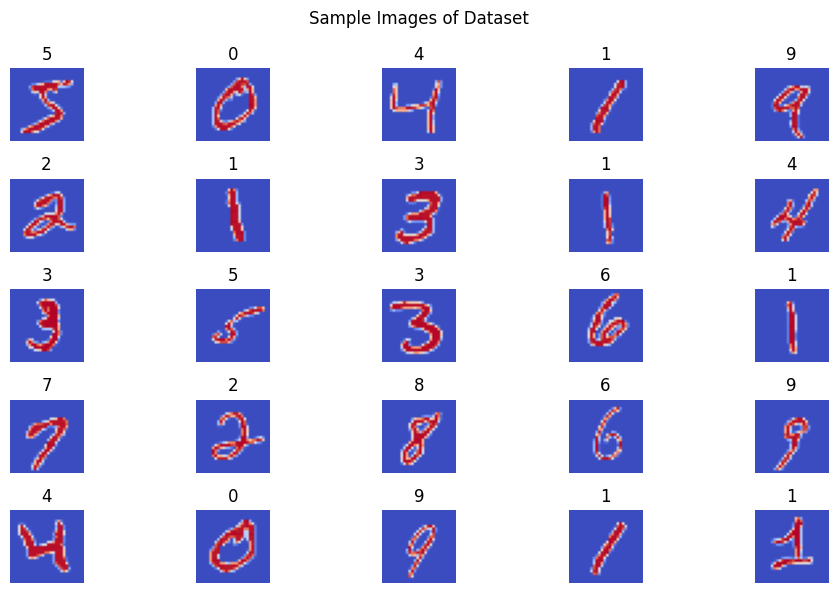

In [41]:
classes = ['0','1','2','3','4','5','6','7','8','9']
plt.figure(figsize=(10, 6))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    image = X_train[i].reshape(28, 28)
    plt.imshow(image, cmap='coolwarm')
    plt.title(classes[np.argmax(y_train[i])])
    plt.axis('off')
plt.suptitle("Sample Images of Dataset")
plt.tight_layout()
plt.show()

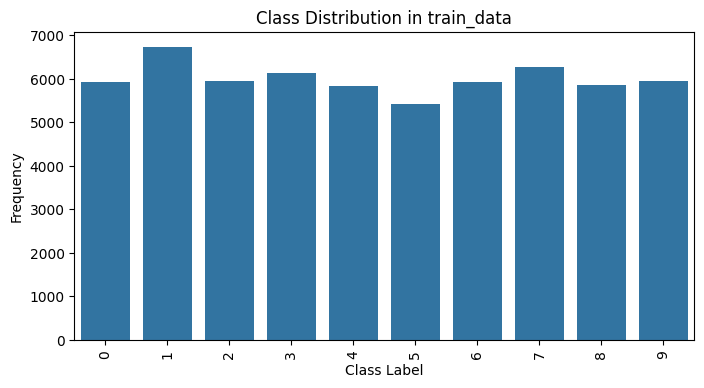

In [45]:
#Class Distribuition
y_labels = np.argmax(y_train, axis=1)
plt.figure(figsize=(8, 4))

# one-hot labels to classes
sns.countplot(x=y_labels)
plt.title("Class Distribution in train_data")
plt.xlabel("Class Label")
plt.ylabel("Frequency")
plt.xticks(ticks=range(10), labels=classes, rotation=90)
plt.show()

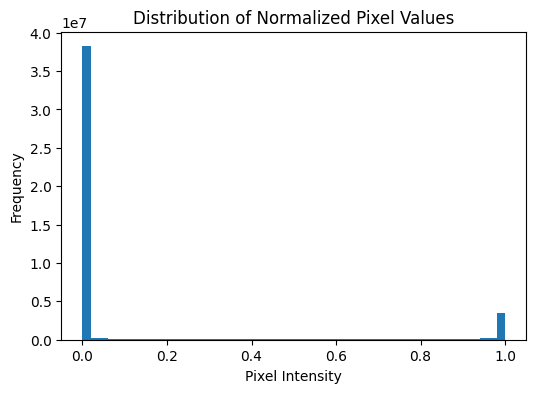

In [46]:
plt.figure(figsize=(6, 4))
plt.hist(X_train.reshape(-1), bins=50)
plt.title("Distribution of Normalized Pixel Values")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

Tasks for the Submission

Task 1

In [47]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [49]:
MLP = MLPClassifier(hidden_layer_sizes=(30, 15, 20), max_iter=500, random_state=42)#hidden_layer_sizes(neuron1, neuron2, neuron3)

In [51]:
#flattening training and testing data for model fitting
X_train_flatten = X_train.reshape(X_train.shape[0], -1)
X_test_flatten = X_test.reshape(X_test.shape[0], -1)

#one-hot encoded to classes
y_train_classes = np.argmax(y_train, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

MLP = MLPClassifier(hidden_layer_sizes=(30, 15, 20), max_iter=500, random_state=42)
MLP.fit(X_train_flatten,y_train_classes)

MLPClassifier(hidden_layer_sizes=(30, 15, 20), max_iter=500, random_state=42)

In [52]:
y_pred_MLP = MLP.predict(X_test_flatten)
accuracy = accuracy_score(y_test_classes, y_pred_MLP)
print('MLP Classifier Accuracy:', accuracy * 100,'%')

MLP Classifier Accuracy: 96.3 %


Task 2

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [60]:
model_RF = RandomForestClassifier(n_estimators=300, max_depth=None, random_state=42, n_jobs=-1)
model_RF.fit(X_train_flatten, y_train_classes)

RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=42)

In [61]:
y_pred_RF = model_RF.predict(X_test_flatten)

In [62]:
print(f"Accuracy: {accuracy_score(y_test_classes, y_pred_RF) * 100:.2f}",'%')

Accuracy: 97.15 %


Task 3

In [63]:
model = Sequential([
    # Layer 1
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    
    # Layer 2
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    # Layer 3
    Conv2D(128, (3,3), activation='relu'),

    # Layer 4
    Conv2D(128, (3,3), activation='relu'),

    # Fully-Connected Layer
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

c:\Users\Vedant\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [64]:
X_test_reshaped = X_test_flatten.reshape(-1, 28, 28, 1)
y_test_classes = to_categorical(y_test_classes, num_classes=10) #classes to one-hot encoded

In [67]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [68]:
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test_reshaped, y_test_classes))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - accuracy: 0.8411 - loss: 0.4965 - val_accuracy: 0.9845 - val_loss: 0.0498
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.9830 - loss: 0.0635 - val_accuracy: 0.9899 - val_loss: 0.0351
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.9892 - loss: 0.0364 - val_accuracy: 0.9894 - val_loss: 0.0347
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.9906 - loss: 0.0311 - val_accuracy: 0.9901 - val_loss: 0.0375
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.9932 - loss: 0.0253 - val_accuracy: 0.9916 - val_loss: 0.0320
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.9940 - loss: 0.0206 - val_accuracy: 0.9897 - val_loss: 0.0328
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.9953 - loss: 0.0175 - val_accuracy: 0.9923 - val_loss: 0.0304
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.9954 - loss: 0.0150 - 

In [69]:
test_loss, test_accuracy = model.evaluate(X_test_reshaped, y_test_classes)
print(f"Accuracy: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9887 - loss: 0.0474
Accuracy: 99.19%


Task 4

In [70]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, adjusted_rand_score
from scipy.optimize import linear_sum_assignment

In [71]:
X_flat = X_train.reshape(X_train.shape[0], -1)
y_labels = np.argmax(y_train, axis=1)

In [72]:
k_means = KMeans(n_clusters=10, random_state=42)
clusters = k_means.fit_predict(X_flat)

In [73]:
conf_matrix = confusion_matrix(y_labels, clusters)
row_ind, col_ind = linear_sum_assignment(-conf_matrix)
accuracy = conf_matrix[row_ind, col_ind].sum() / X_flat.shape[0]

In [74]:
print(f"Clustering Accuracy: {accuracy*100:.2f}%")

Clustering Accuracy: 53.94%


Lets imporve this accuracy by performing PCA

In [75]:
from sklearn.decomposition import PCA

In [76]:
X_pca = PCA(n_components=50).fit_transform(X_flat)

In [77]:
clusters = KMeans(n_clusters=10, random_state=42).fit_predict(X_pca)

In [78]:
conf_matrix = confusion_matrix(y_labels, clusters)
row_ind, col_ind = linear_sum_assignment(-conf_matrix)
accuracy = conf_matrix[row_ind, col_ind].sum() / X_flat.shape[0]
print(f"Clustering Accuracy: {accuracy*100:.2f}%")

Clustering Accuracy: 51.32%
